## Задача прогнозирования оттока клиентов в телекоме

### Данные:

Датасет представляет собой файл churn.csv, на основе которого вы должны построить модель и протестировать модель используя кросс-валидацию.

Все переменные датасета не требуют обьяснения, поскольку понятны из названия.

### Задача:

Бинарная вероятностная классификация.

Ваша задача — спрогнозировать отток клиентов (переменная Churn, принимающая значения [0,1]). Также необходимо спрогнозировать вероятность для данной переменной Churn.

Алгоритм для выполнения задачи можно выбирать любой. Кросс-валидация должна выполняться методом KFold с n_folds=10

### Ход работы:

1. Провести первичный анализ данных: описательные статистики, распределения, наличия пропущенных значений.

2. Осуществить препроцессинг и подготовку данных: выбрать стратегию работы с пропущенными значениями (обьяснить свой выбор), осуществить обработку категориальных значений (обьяснить выбор метода), осуществить генерацию дополнительных фичей (обьяснить логику). 

3. Провести корреляционный анализ и проверить выбор дополнительных фичей в сете.

4. Отобрать фичи для построения модели используя подход VarianceThreshold. Обьяснить принцип работы.

5. Отобрать фичи для построения модели используя любой из методов Univariate Feature Selection (к примеру SelectKBest или SelectPercentile). Обьяснить принцип работы.

6. Отобрать фичи для построения модели используя на выбор либо L1-регрессию (Lasso) либо подход основанный на использовании деревьев (Tree-based). Обьяснить принцип работы.

7. Протестировать на тренировочном дата сете различные наборы фичей и их работу с выбранными алгоритмами для осуществления предсказания.

8. Выбрать лучший набор фичей и лучший алгоритм для осуществленния как предсказания классов так и вероятности. Провести сравнение на тестовой выборке используя следующие метрики для оценки качества алгоритма: 

    -Классификация: Accuracy Score, f1-Score, Precision, Recall
    
    -Вероятность: log_loss Score    
    
9. Задания принимаются в виде ноутбука с полным кодом работы.

In [21]:
%matplotlib inline

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [22]:
data = pd.read_csv('churn.csv')

In [23]:
data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


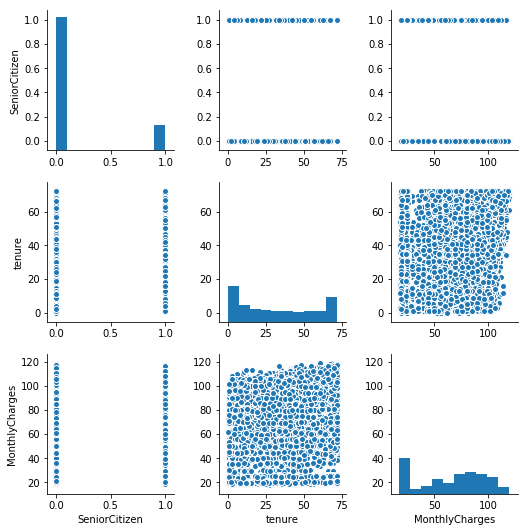

In [24]:
sns.pairplot(data);

In [25]:
# Хороший датасет - нет пропущенных значений
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
customerID          7043 non-null object
gender              7043 non-null object
SeniorCitizen       7043 non-null int64
Partner             7043 non-null object
Dependents          7043 non-null object
tenure              7043 non-null int64
PhoneService        7043 non-null object
MultipleLines       7043 non-null object
InternetService     7043 non-null object
OnlineSecurity      7043 non-null object
OnlineBackup        7043 non-null object
DeviceProtection    7043 non-null object
TechSupport         7043 non-null object
StreamingTV         7043 non-null object
StreamingMovies     7043 non-null object
Contract            7043 non-null object
PaperlessBilling    7043 non-null object
PaymentMethod       7043 non-null object
MonthlyCharges      7043 non-null float64
TotalCharges        7043 non-null object
Churn               7043 non-null object
dtypes: float64(1), int64(2), obj

In [26]:
# Посмотрим на значения фичей
for column in data.columns:
    print(column, data[column].value_counts(), sep='\n', end='\n\n')

customerID
8999-XXGNS    1
2186-QZEYA    1
5307-UVGNB    1
0487-RPVUM    1
9560-ARGQJ    1
4178-EGMON    1
2205-LPVGL    1
3496-LFSZU    1
7446-KQISO    1
6778-YSNIH    1
3786-WOVKF    1
8039-EQPIM    1
6629-LADHQ    1
0318-ZOPWS    1
0402-OAMEN    1
5777-ZPQNC    1
4903-UYAVB    1
8097-VBQTZ    1
9499-XPZXM    1
9715-WZCLW    1
9730-DRTMJ    1
5066-GFJMM    1
0052-YNYOT    1
8777-PVYGU    1
6351-SCJKT    1
3144-AUDBS    1
5399-ZIMKF    1
7802-EFKNY    1
3545-CNWRG    1
5360-XGYAZ    1
             ..
6207-WIOLX    1
6360-SVNWV    1
9700-ZCLOT    1
2894-QOJRX    1
4732-RRJZC    1
6599-CEBNN    1
1431-AIDJQ    1
2811-POVEX    1
5961-VUSRV    1
3672-YITQD    1
1871-MOWRM    1
2325-ZUSFD    1
4853-OITSN    1
4795-WRNVT    1
5229-DTFYB    1
5143-WMWOG    1
2027-CWDNU    1
3716-UVSPD    1
8404-FYDIB    1
9489-JMTTN    1
1077-HUUJM    1
8133-ANHHJ    1
3170-NMYVV    1
2832-SCUCO    1
3538-WZPHD    1
4486-EFAEB    1
7623-HKYRK    1
1583-IHQZE    1
3606-TWKGI    1
7750-EYXWZ    1
Name: custome

In [27]:
# Посмотрим на customerID
data.customerID.str.contains('-').all()

True

In [28]:
# Теоретически _CID1 может отражать порядок прихода абонентов к оператору, т.е. чем меньше _CID, тем "старее" абонент
data['_CID1'], _ = zip(*data.customerID.str.split('-'))
data._CID1 = data._CID1.astype('int')
data.drop('customerID', axis=1, inplace=True)

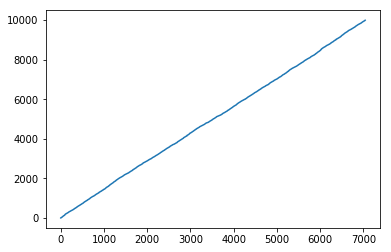

In [29]:
plt.plot(sorted(data._CID1));

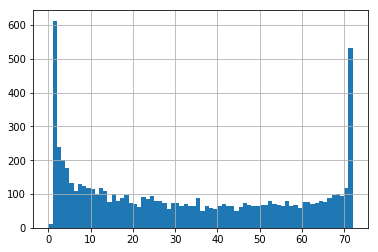

In [30]:
# Количество месяцев, сколько человек является абонентом => вероятно, диапазон урезан и это выбросы
data.tenure.hist(bins=data.tenure.max()-data.tenure.min());

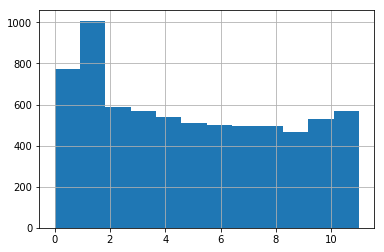

In [31]:
# Посмотрим, имеет ли сезонность какое-то значение;
# это совершенно не обязательно, т.к. неизвестно, сколько месяцев назад абонент ушёл,
(data.tenure % 12).hist(bins=12);

In [32]:
# Среди TotalCharges есть пустые значения ' ' - исправим:
from sklearn.preprocessing import Imputer

def convert_TotalCharges(value):
    try:
        return np.float64(value)
    except:
        return np.float64(0)

data.TotalCharges = data.TotalCharges.apply(convert_TotalCharges)
data.TotalCharges = Imputer(missing_values=0, strategy='mean').fit_transform(data.TotalCharges[:, np.newaxis])

In [33]:
# Категориальные фичи
cat_features = data.dtypes[ data.dtypes == object ].index
# Непрерывные фичи
num_features = data.columns.difference(cat_features)
# Исключим Churn
cat_features = cat_features.difference({'Churn'})

In [34]:
data.Churn.replace({'Yes': 1, 'No': 0}, inplace=True)

In [35]:
# Ещё раз посмотрим на категориальные фичи
for feature in cat_features:
    for value in data[feature].unique():
        print(f'{feature}:{value}')

Contract:Month-to-month
Contract:One year
Contract:Two year
Dependents:No
Dependents:Yes
DeviceProtection:No
DeviceProtection:Yes
DeviceProtection:No internet service
InternetService:DSL
InternetService:Fiber optic
InternetService:No
MultipleLines:No phone service
MultipleLines:No
MultipleLines:Yes
OnlineBackup:Yes
OnlineBackup:No
OnlineBackup:No internet service
OnlineSecurity:No
OnlineSecurity:Yes
OnlineSecurity:No internet service
PaperlessBilling:Yes
PaperlessBilling:No
Partner:Yes
Partner:No
PaymentMethod:Electronic check
PaymentMethod:Mailed check
PaymentMethod:Bank transfer (automatic)
PaymentMethod:Credit card (automatic)
PhoneService:No
PhoneService:Yes
StreamingMovies:No
StreamingMovies:Yes
StreamingMovies:No internet service
StreamingTV:No
StreamingTV:Yes
StreamingTV:No internet service
TechSupport:No
TechSupport:Yes
TechSupport:No internet service
gender:Female
gender:Male


In [36]:
# Для категориальных фичей применим метод COUNTS
# Ещё бы добавил WoE и IV, но уже просто не остаётся времени :(
for feature in cat_features:
    mapping = {}
    for value in data[feature].unique():
        A = len(data[ (data[feature] == value) & (data['Churn'] == 1.0)])
        B = len([ (data[feature] == value) ])
        mapping[value] = A / B
    print(mapping)
    data[feature].replace(mapping, inplace=True)

{'Month-to-month': 1655.0, 'One year': 166.0, 'Two year': 48.0}
{'No': 1543.0, 'Yes': 326.0}
{'No': 1211.0, 'Yes': 545.0, 'No internet service': 113.0}
{'DSL': 459.0, 'Fiber optic': 1297.0, 'No': 113.0}
{'No phone service': 170.0, 'No': 849.0, 'Yes': 850.0}
{'Yes': 523.0, 'No': 1233.0, 'No internet service': 113.0}
{'No': 1461.0, 'Yes': 295.0, 'No internet service': 113.0}
{'Yes': 1400.0, 'No': 469.0}
{'Yes': 669.0, 'No': 1200.0}
{'Electronic check': 1071.0, 'Mailed check': 308.0, 'Bank transfer (automatic)': 258.0, 'Credit card (automatic)': 232.0}
{'No': 170.0, 'Yes': 1699.0}
{'No': 938.0, 'Yes': 818.0, 'No internet service': 113.0}
{'No': 942.0, 'Yes': 814.0, 'No internet service': 113.0}
{'No': 1446.0, 'Yes': 310.0, 'No internet service': 113.0}
{'Female': 939.0, 'Male': 930.0}


In [37]:
data.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,...,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,_CID1
0,939.0,0,669.0,1543.0,1,170.0,170.0,459.0,1461.0,523.0,...,1446.0,942.0,938.0,1655.0,1400.0,1071.0,29.85,29.85,0,7590
1,930.0,0,1200.0,1543.0,34,1699.0,849.0,459.0,295.0,1233.0,...,1446.0,942.0,938.0,166.0,469.0,308.0,56.95,1889.50,0,5575
2,930.0,0,1200.0,1543.0,2,1699.0,849.0,459.0,295.0,523.0,...,1446.0,942.0,938.0,1655.0,1400.0,308.0,53.85,108.15,1,3668
3,930.0,0,1200.0,1543.0,45,170.0,170.0,459.0,295.0,1233.0,...,310.0,942.0,938.0,166.0,469.0,258.0,42.30,1840.75,0,7795
4,939.0,0,1200.0,1543.0,2,1699.0,849.0,1297.0,1461.0,1233.0,...,1446.0,942.0,938.0,1655.0,1400.0,1071.0,70.70,151.65,1,9237


In [38]:
# Добавим новую фичу - средняя плата за месяц (возможно, были месяцы, когда абонент не платил)
# data['_AvgCharge'] = data.TotalCharges / data.MonthlyCharges
# А нет, это была плохая идея - 100% корреляция с Tenure, что логично (увидел на heatmap)

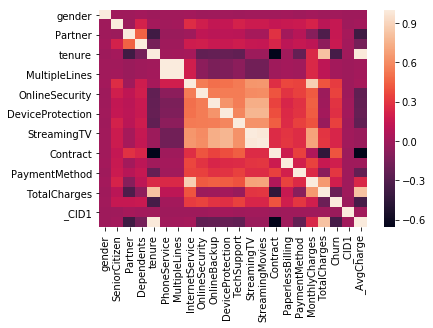

In [20]:
sns.heatmap(data.corr());

Коррелируют фичи PhoneService/MultipleLines и StreamingTV/StreamingMovies => Мультиколлинеарность, можно избавиться.
Также весьма сильно связаны MonthlyCharges/InternetService.

In [41]:
high_corr = ['PhoneService', 'MultipleLines', 'StreamingTV', 'StreamingMovies']
data.corr().loc[high_corr, high_corr] # 100% корреляция => смело удаляем

,PhoneService,MultipleLines,StreamingTV,StreamingMovies
PhoneService,1.000000,0.999997,-0.179013,-0.176974
MultipleLines,0.999997,1.000000,-0.178462,-0.176419
StreamingTV,-0.179013,-0.178462,1.000000,0.983370
StreamingMovies,-0.176974,-0.176419,0.983370,1.000000


In [42]:
data.drop(['MultipleLines', 'StreamingMovies'], axis=1, inplace=True)

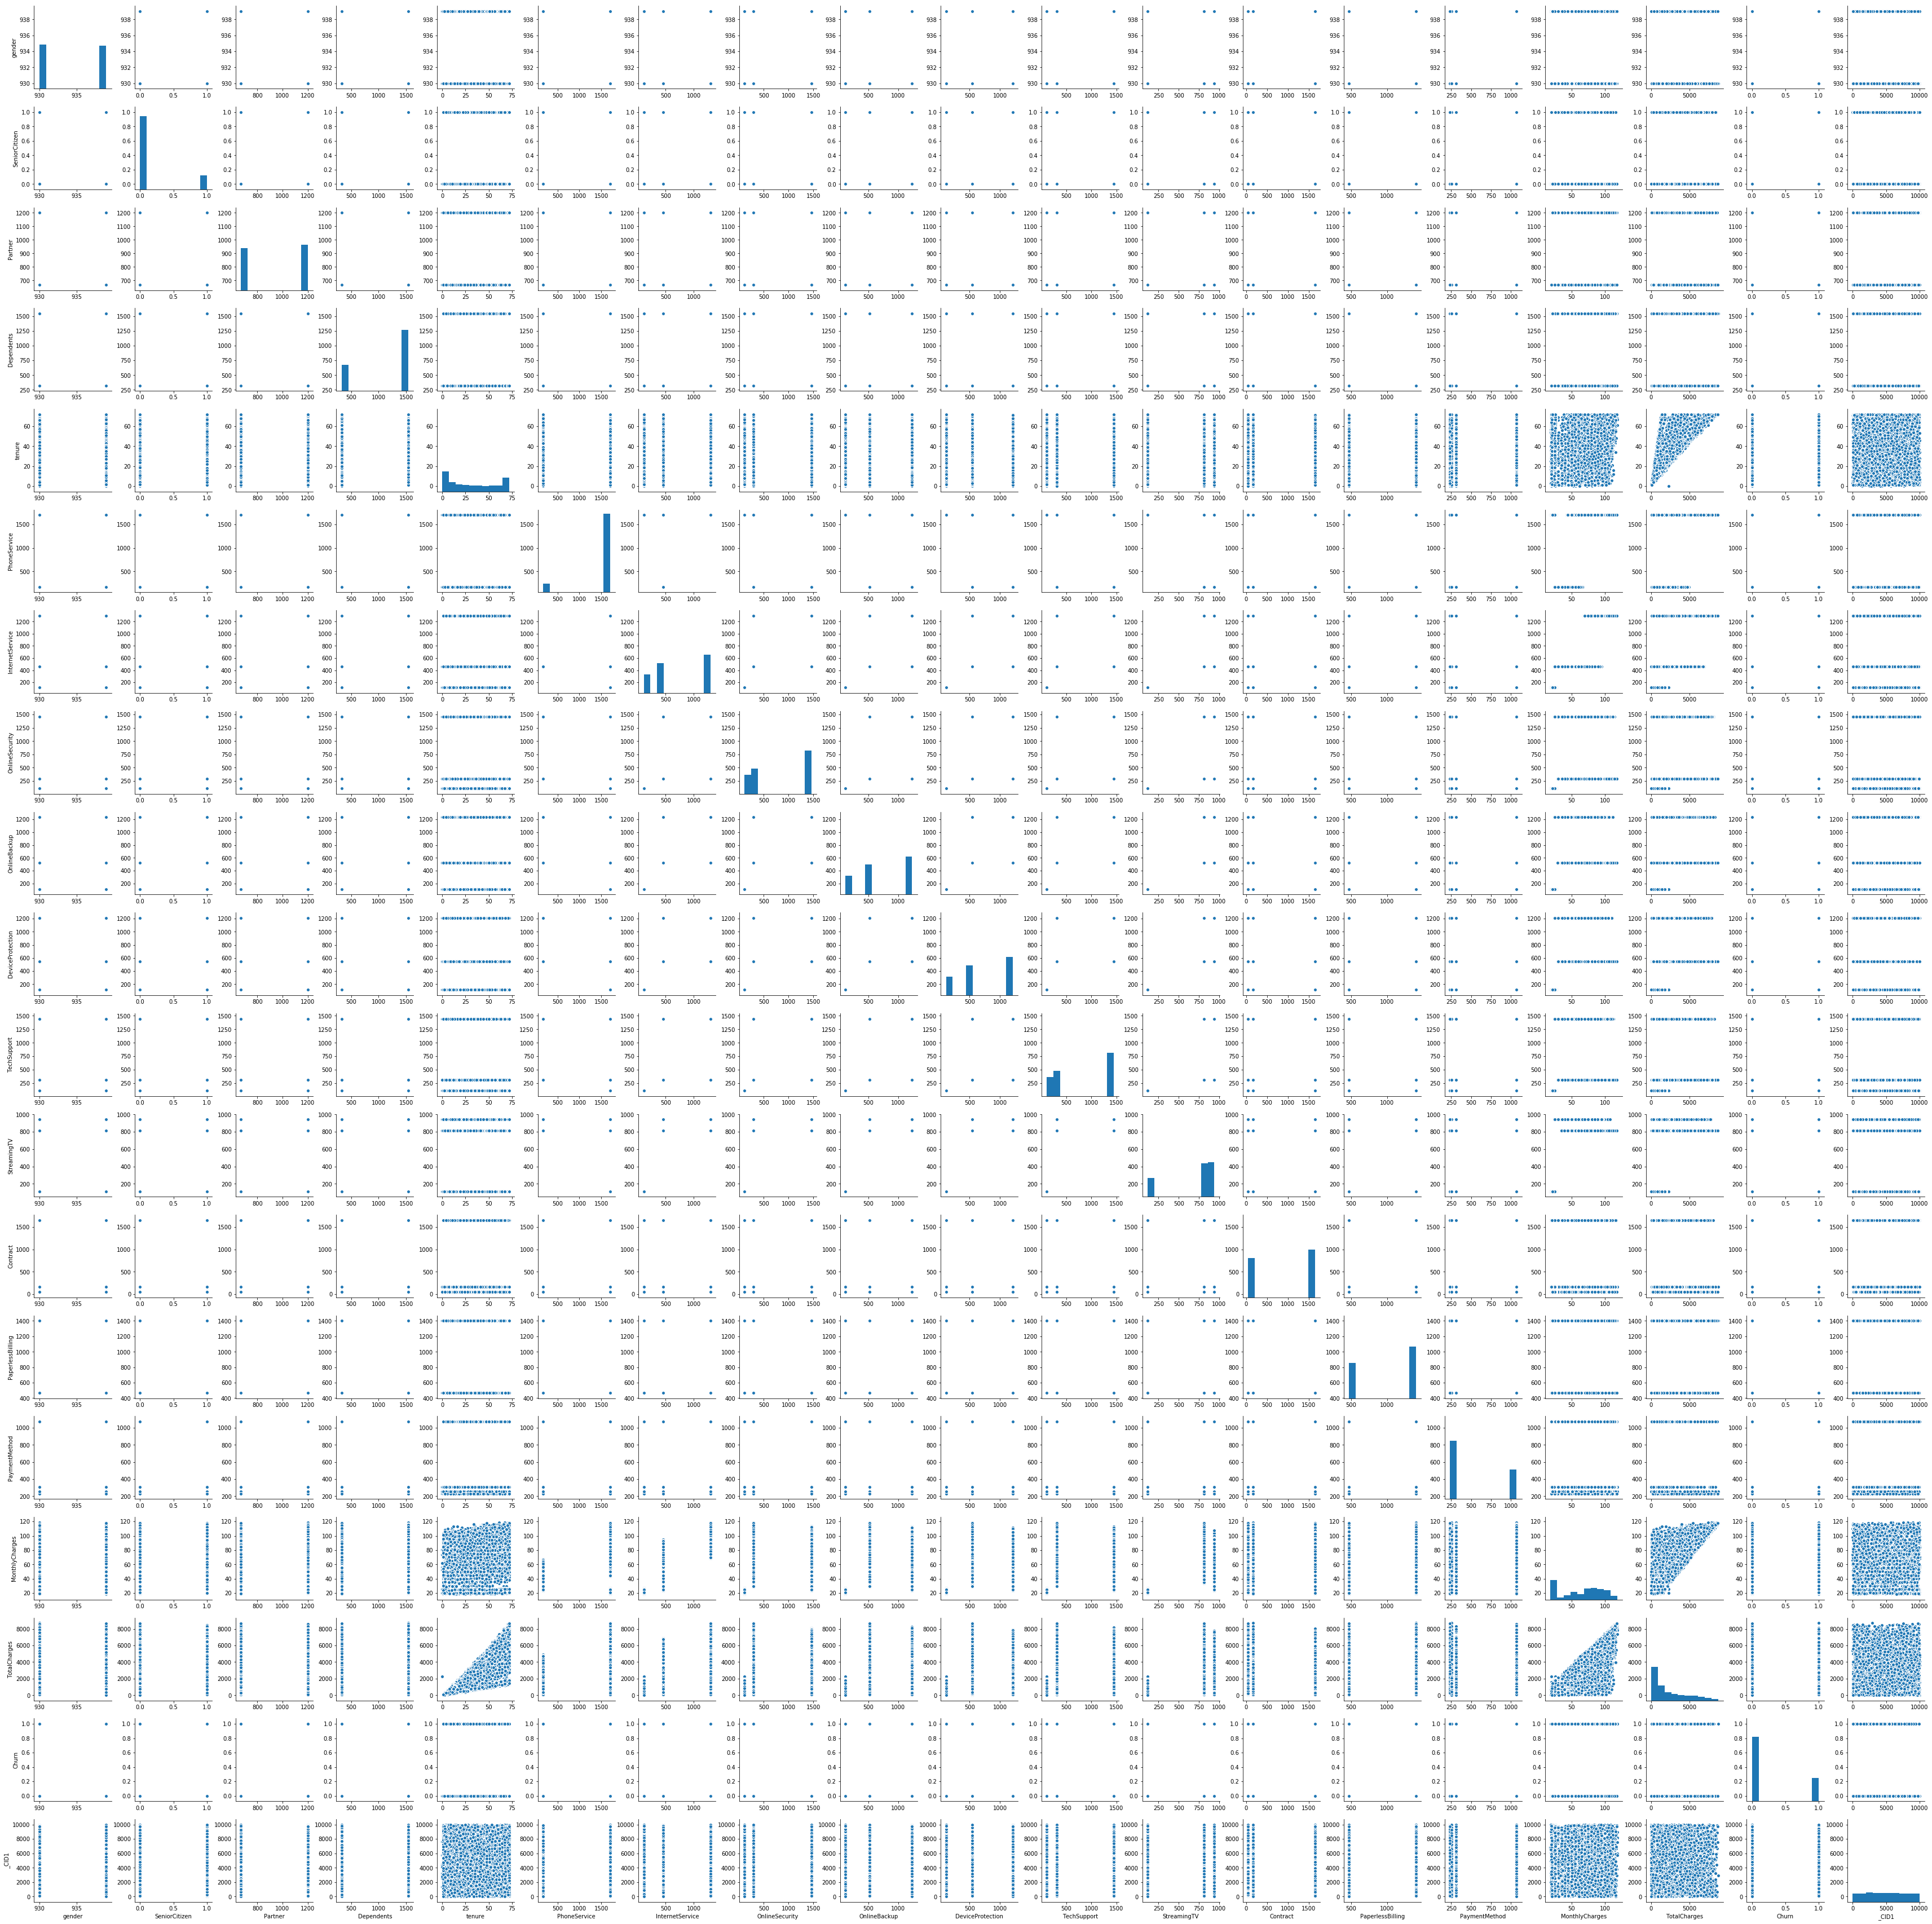

In [43]:
sns.pairplot(data)

Видно, что также связаны TotalCharges, MonthlyCharges и Tenure.

In [364]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

In [365]:
Y = data.Churn
X = data.drop('Churn', axis=1)

In [366]:
X_scaled = pd.DataFrame(StandardScaler().fit_transform(X), columns=X.columns)

In [367]:
pca = PCA()
pca.fit(X_scaled)

PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

In [368]:
cumsum = np.cumsum(pca.explained_variance_ratio_)

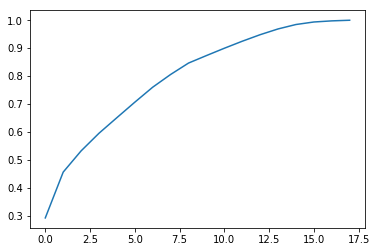

In [369]:
# Нет явного излома - в принципе, все фичи важны
plt.plot(cumsum);

In [372]:
X_scaled.describe().T

,count,mean,std,min,25%,50%,75%,max
gender,7043.0,4.160018e-15,1.000071,-0.990532,-0.990532,-0.990532,1.009559,1.009559
SeniorCitizen,7043.0,6.417792e-16,1.000071,-0.439916,-0.439916,-0.439916,-0.439916,2.273159
Partner,7043.0,-1.960664e-16,1.000071,-1.034530,-1.034530,0.966622,0.966622,0.966622
Dependents,7043.0,6.825594e-17,1.000071,-1.529024,-1.529024,0.654012,0.654012,0.654012
tenure,7043.0,5.945991e-17,1.000071,-1.318165,-0.951682,-0.137274,0.921455,1.613701
PhoneService,7043.0,-1.963753e-15,1.000071,-3.054010,0.327438,0.327438,0.327438,0.327438
InternetService,7043.0,-5.241678e-16,1.000071,-1.282539,-0.588521,-0.588521,1.092366,1.092366
OnlineSecurity,7043.0,2.167481e-16,1.000071,-1.153878,-0.862881,-0.862881,1.001422,1.001422
OnlineBackup,7043.0,-5.315451e-17,1.000071,-1.386925,-0.487841,-0.487841,1.069110,1.069110
DeviceProtection,7043.0,4.950053e-16,1.000071,-1.426438,-0.449965,-0.449965,1.055431,1.055431


In [376]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

In [377]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

params = [
    {
        'criterion': ['gini', 'entropy'],
        'splitter': ['best', 'random'],
        'max_depth': range(15, 20),
        'min_samples_leaf': range(5, 30, 5),
        'max_features': [0.2, 0.4, 0.6, 0.8, 1.0],
        'random_state': [42],
        'presort': [False, True],
    }
]

grid_search = GridSearchCV(DecisionTreeClassifier(), param_grid=params, scoring='roc_auc', n_jobs=-1, cv=10, verbose=2)
grid_search.fit(X, Y)

In [378]:
grid_search.fit(X, Y)

Fitting 10 folds for each of 1000 candidates, totalling 10000 fits


[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:   10.7s
[Parallel(n_jobs=-1)]: Done 932 tasks      | elapsed:   18.9s
[Parallel(n_jobs=-1)]: Done 2556 tasks      | elapsed:   34.0s
[Parallel(n_jobs=-1)]: Done 4820 tasks      | elapsed:   58.3s
[Parallel(n_jobs=-1)]: Done 7740 tasks      | elapsed:  1.5min
[Parallel(n_jobs=-1)]: Done 10000 out of 10000 | elapsed:  2.0min finished


GridSearchCV(cv=10, error_score='raise',
       estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best'),
       fit_params=None, iid=True, n_jobs=-1,
       param_grid=[{'criterion': ['gini', 'entropy'], 'splitter': ['best', 'random'], 'max_depth': range(15, 20), 'min_samples_leaf': range(5, 30, 5), 'max_features': [0.2, 0.4, 0.6, 0.8, 1.0], 'random_state': [42], 'presort': [False, True]}],
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='roc_auc', verbose=2)

In [379]:
grid_search.best_score_ # roc_auc

0.82790922861374316

In [380]:
grid_search.best_params_

{'criterion': 'gini',
 'max_depth': 15,
 'max_features': 0.8,
 'min_samples_leaf': 25,
 'presort': False,
 'random_state': 42,
 'splitter': 'random'}

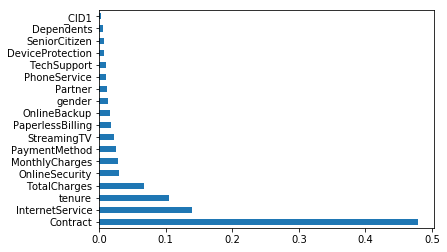

In [388]:
feature_importances = pd.Series(grid_search.best_estimator_.feature_importances_, index=X.columns)
feature_importances.nlargest(feature_importances.count()).plot(kind='barh');

In [389]:
clf_tree = DecisionTreeClassifier(**grid_search.best_params_)

In [390]:
from sklearn.model_selection import train_test_split

In [391]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [392]:
clf_tree.fit(X_train, Y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=15,
            max_features=0.8, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=25, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=42,
            splitter='random')

In [393]:
from sklearn.metrics import roc_auc_score, f1_score, accuracy_score, precision_score, recall_score
from sklearn.metrics import roc_curve, precision_recall_curve

In [394]:
Y_pred = clf_tree.predict(X_test)
Y_pred_proba = clf_tree.predict_proba(X_test)

In [403]:
for score in [roc_auc_score, f1_score, accuracy_score, precision_score, recall_score]:
    try:
        print(score.__name__, score(Y_test, Y_pred_proba[:, 1]), sep=' => ')
    except ValueError:
        print(score.__name__, score(Y_test, Y_pred), sep=' => ')

roc_auc_score => 0.832712691627
f1_score => 0.594268476621
accuracy_score => 0.809084457062
precision_score => 0.679310344828
recall_score => 0.528150134048


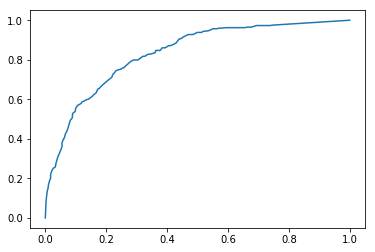

In [412]:
fpr1, tpr1, _ = roc_curve(Y_test, Y_pred_proba[:, 1])
plt.plot(fpr1, tpr1, label='ROC_AUC');

In [417]:
from sklearn.linear_model import LogisticRegression

In [431]:
X_train, X_test, Y_train, Y_test = train_test_split(X_scaled, Y, test_size=0.2, random_state=42)

params = [
    {
        'penalty': ['l1', 'l2'],
        'C': [0.001, 0.01, 0.1, 1.0, 10, 100, 1000],
        'solver': ['liblinear', 'saga'],
    },
    {
        'penalty': ['l2'],
        'C': [0.001, 0.01, 0.1, 1.0, 10, 100, 1000],
        'solver': ['newton-cg', 'lbfgs', 'sag'],        
    }
]

grid_search = GridSearchCV(LogisticRegression(), param_grid=params, scoring='roc_auc', n_jobs=-1, cv=10, verbose=2)

In [432]:
grid_search.fit(X, Y)

Fitting 10 folds for each of 49 candidates, totalling 490 fits


[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:   10.3s
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:   29.1s
[Parallel(n_jobs=-1)]: Done 357 tasks      | elapsed:  1.0min
[Parallel(n_jobs=-1)]: Done 490 out of 490 | elapsed:  1.4min finished


GridSearchCV(cv=10, error_score='raise',
       estimator=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False),
       fit_params=None, iid=True, n_jobs=-1,
       param_grid=[{'penalty': ['l1', 'l2'], 'C': [0.001, 0.01, 0.1, 1.0, 10, 100, 1000], 'solver': ['liblinear', 'saga']}, {'penalty': ['l2'], 'C': [0.001, 0.01, 0.1, 1.0, 10, 100, 1000], 'solver': ['newton-cg', 'lbfgs', 'sag']}],
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='roc_auc', verbose=2)

In [433]:
grid_search.best_score_

0.84408727270353523

In [434]:
grid_search.best_params_

{'C': 10, 'penalty': 'l1', 'solver': 'liblinear'}

In [435]:
clf_lr = LogisticRegression(**grid_search.best_params_)

In [436]:
clf_lr.fit(X_train, Y_train)

LogisticRegression(C=10, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l1', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [441]:
Y_pred = clf_lr.predict(X_test)
Y_pred_proba = clf_lr.predict_proba(X_test)

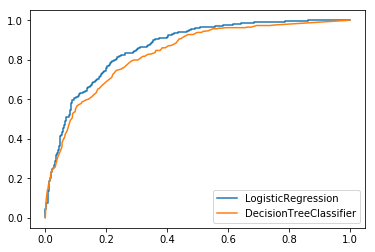

In [446]:
fpr2, tpr2, _ = roc_curve(Y_test, Y_pred_proba[:, 1])
plt.plot(fpr2, tpr2, label='LogisticRegression');
plt.plot(fpr1, tpr1, label='DecisionTreeClassifier');
plt.legend();

In [447]:
roc_auc_score(Y_test, Y_pred_proba[:, 1])

0.86331218234703488